In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt

In [2]:
prot_table = pd.read_excel('pr9_1.xlsx')

In [42]:
prot_table.head(5)

Entry                                      Protein names  Length  \
0  P13551                         Elongation factor G (EF-G)     691   
1  P0A6M8                         Elongation factor G (EF-G)     704   
2  O07631  50S ribosomal subunit assembly factor BipA (EC...     612   
3  P68790  Elongation factor G (EF-G) (85 kDa vitronectin...     693   
4  P80868  Elongation factor G (EF-G) (Vegetative protein...     692   

                     Cross-reference (Pfam)                        Organism  \
0  PF00679;PF14492;PF03764;PF00009;PF03144;            Thermus thermophilus   
1  PF00679;PF14492;PF03764;PF00009;PF03144;   Escherichia coli (strain K12)   
2          PF00679;PF14492;PF00009;PF03144;  Bacillus subtilis (strain 168)   
3  PF00679;PF14492;PF03764;PF00009;PF03144;           Staphylococcus aureus   
4  PF00679;PF14492;PF03764;PF00009;PF03144;  Bacillus subtilis (strain 168)   

  Taxonomic lineage (PHYLUM) Taxonomic lineage (FAMILY)  \
0        Deinococcus-Thermus                 Thermaceae   
1             Proteobacteria         Enterobacteriaceae   
2                 Firmicutes                Bacillaceae   
3                 Firmicutes          Staphylococcaceae   
4                 Firmicutes                Bacillaceae   

  Taxonomic lineage (GENUS)  Entry name    Status                 Gene names  
0                   Thermus   EFG_THETH  reviewed                   fusA fus  
1               Escherichia   EFG_ECOLI  reviewed  fusA far fus b3340 JW3302  
2                  Bacillus  BIPA_BACSU  reviewed    bipA typA ylaG BSU14770  
3            Staphylococcus   EFG_STAAU  reviewed                   fusA fus  
4                  Bacillus   EFG_BACSU  reviewed          fusA fus BSU01120

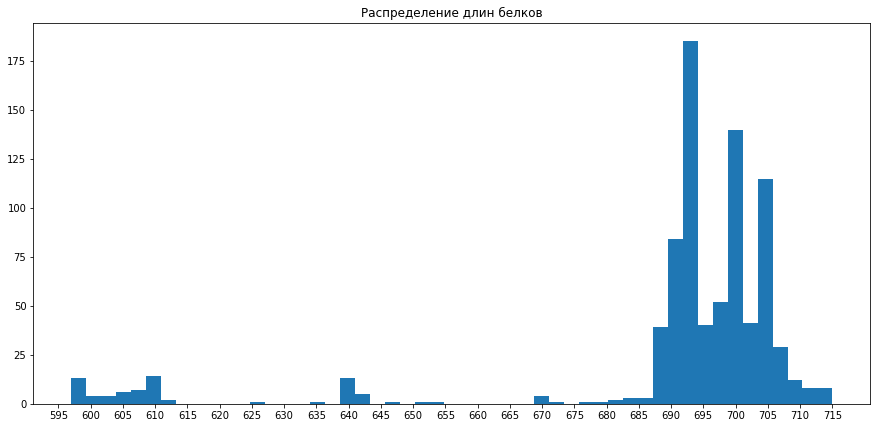

In [23]:
pt.figure(figsize = (15, 7))
pt.hist(prot_table['Length'], 'auto')
pt.title('Распределение длин белков')
pt.xticks(range(595, 720, 5))
pt.show()

In [25]:
domain_filter = (prot_table['Cross-reference (Pfam)'] == 'PF14492;PF00009;') | (prot_table['Cross-reference (Pfam)'] == 'PF00009;PF14492;')
length_filter = (prot_table['Length'] >= 687) & (prot_table['Length'] <= 706)
selected_table = prot_table[domain_filter & length_filter]
selected_table

Empty DataFrame
Columns: [Entry, Protein names, Length, Cross-reference (Pfam), Organism, Taxonomic lineage (PHYLUM), Taxonomic lineage (FAMILY), Taxonomic lineage (GENUS), Entry name, Status, Gene names]
Index: []

In [64]:
selected_table = prot_table[length_filter]
def uniq(string):
    if string not in genus_list:
        ans = True
        genus_list.append(string)
    else:
        ans = False
    return(ans)
genus_list = []
final_table = selected_table[selected_table['Taxonomic lineage (GENUS)'].apply(uniq)].head(60)
prot_table['selected'] = False
prot_table.loc[final_table.index, ['selected']] = True
prot_table.head(5)

Entry                                      Protein names  Length  \
0  P13551                         Elongation factor G (EF-G)     691   
1  P0A6M8                         Elongation factor G (EF-G)     704   
2  O07631  50S ribosomal subunit assembly factor BipA (EC...     612   
3  P68790  Elongation factor G (EF-G) (85 kDa vitronectin...     693   
4  P80868  Elongation factor G (EF-G) (Vegetative protein...     692   

                     Cross-reference (Pfam)                        Organism  \
0  PF00679;PF14492;PF03764;PF00009;PF03144;            Thermus thermophilus   
1  PF00679;PF14492;PF03764;PF00009;PF03144;   Escherichia coli (strain K12)   
2          PF00679;PF14492;PF00009;PF03144;  Bacillus subtilis (strain 168)   
3  PF00679;PF14492;PF03764;PF00009;PF03144;           Staphylococcus aureus   
4  PF00679;PF14492;PF03764;PF00009;PF03144;  Bacillus subtilis (strain 168)   

  Taxonomic lineage (PHYLUM) Taxonomic lineage (FAMILY)  \
0        Deinococcus-Thermus                 Thermaceae   
1             Proteobacteria         Enterobacteriaceae   
2                 Firmicutes                Bacillaceae   
3                 Firmicutes          Staphylococcaceae   
4                 Firmicutes                Bacillaceae   

  Taxonomic lineage (GENUS)  Entry name    Status                 Gene names  \
0                   Thermus   EFG_THETH  reviewed                   fusA fus   
1               Escherichia   EFG_ECOLI  reviewed  fusA far fus b3340 JW3302   
2                  Bacillus  BIPA_BACSU  reviewed    bipA typA ylaG BSU14770   
3            Staphylococcus   EFG_STAAU  reviewed                   fusA fus   
4                  Bacillus   EFG_BACSU  reviewed          fusA fus BSU01120   

   selected  
0      True  
1      True  
2     False  
3      True  
4      True

In [68]:
prot_table.to_excel('pr9_1_modified.xls')
final_table[['Taxonomic lineage (FAMILY)', 'Taxonomic lineage (GENUS)']].to_csv('pr9_1_family_genus.csv', index = False)

In [70]:
' OR '.join(final_table['Entry'])

'P13551 OR P0A6M8 OR P68790 OR P80868 OR P9WNM7 OR A5I7K9 OR Q60BD3 OR P28371 OR Q6MP77 OR B5R297 OR Q6LVC1 OR Q46WE0 OR B5E6U5 OR Q3J8R1 OR C1DAR4 OR A9BHA8 OR B2A4D6 OR C1KZK7 OR Q8FS85 OR Q11QB0 OR Q0HRE9 OR A5USJ2 OR B2UUV6 OR B2IA64 OR Q3J5S5 OR Q47LJ0 OR Q73IX7 OR B0U0Z1 OR Q2NZY2 OR Q9PPW7 OR A8LC59 OR B0KCJ7 OR B1MW21 OR Q7N9B2 OR Q5YPG3 OR B9L7K0 OR A1SNN6 OR Q492B1 OR O84444 OR A8FKR7 OR Q15YA7 OR Q1BU86 OR Q7W455 OR Q9HWD2 OR A9KD34 OR A4J108 OR B3QY21 OR B9JVN4 OR A1W2Q4 OR Q8R7V1 OR A3N247 OR C5C0J4 OR A4SCQ6 OR Q2YM00 OR B9MQH0 OR Q21M89 OR C1AYS4 OR Q2IXR3 OR Q2LTB9 OR Q0SMX0'